In [185]:
import pandas as pd

Dataset - https://www.kaggle.com/datasets/smritisingh1997/car-salescsv

In [186]:
cars_data=pd.read_csv('/1.04. Real-life example.csv')

We are trying to predict the car price using its features like mileage, engine, brand, body

#1)Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

In [187]:
cars_data.shape

(4345, 9)

9 features and 4345 records

In [188]:
cars_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Price, Mileage, EngineV are continuous valued and Model, Body, Brand, Registration, EngineType are categorical

In [189]:
cars_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [190]:
cars_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


2) Display the statistical values for each of the attributes, along with visualizations (e.g.,histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [309]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

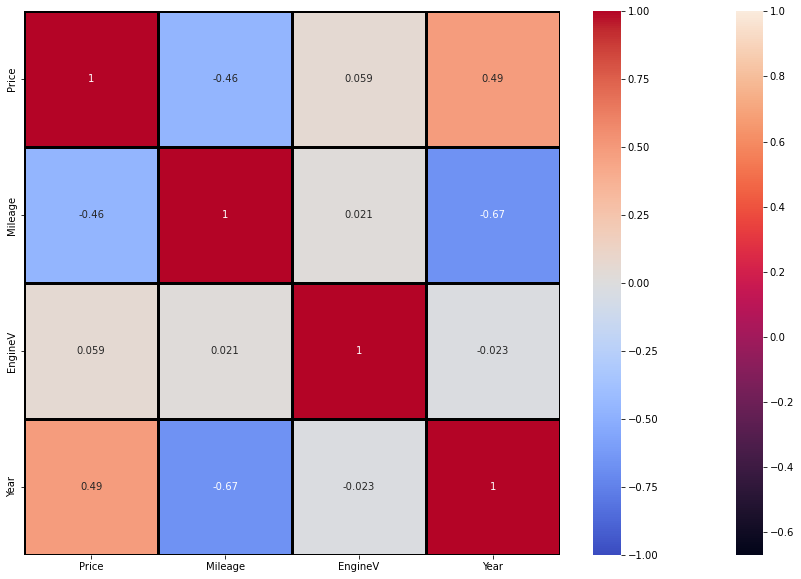

In [192]:
#Determining the coorelation between different attributes and analysing their features
plt.figure(figsize=(15, 10))               

sns.heatmap(cars_data[[ 'Brand','Price','Body','Mileage','EngineV','Engine Type','Registration','Year','Model']].corr())               
sns.heatmap(cars_data[[ 'Brand','Price','Body','Mileage','EngineV','Engine Type','Registration','Year','Model']].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')  
plt.show()

In [193]:
#checking null values
cars_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

There are 312 different models(categorical) and encoding it will make the model too complex and hence dropping it


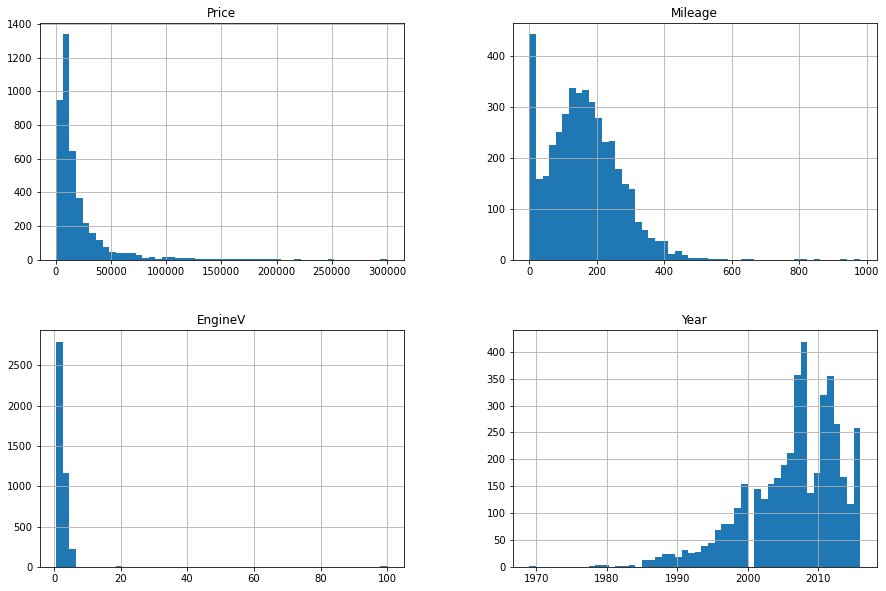

In [194]:
cars_data.hist(bins=50, figsize=(15,10))
plt.show()

In [195]:
#dropping na records
cars_data.dropna(axis=0, inplace=True)

In [198]:
cars_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

Price         AxesSubplot(0.125,0.71587;0.168478x0.16413)
Mileage    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
EngineV    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Year       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
dtype: object

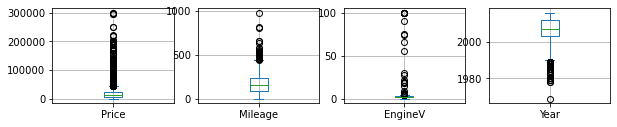

In [199]:
cars_data[[ 'Brand','Price','Body','Mileage','EngineV','Engine Type','Registration','Year','Model']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

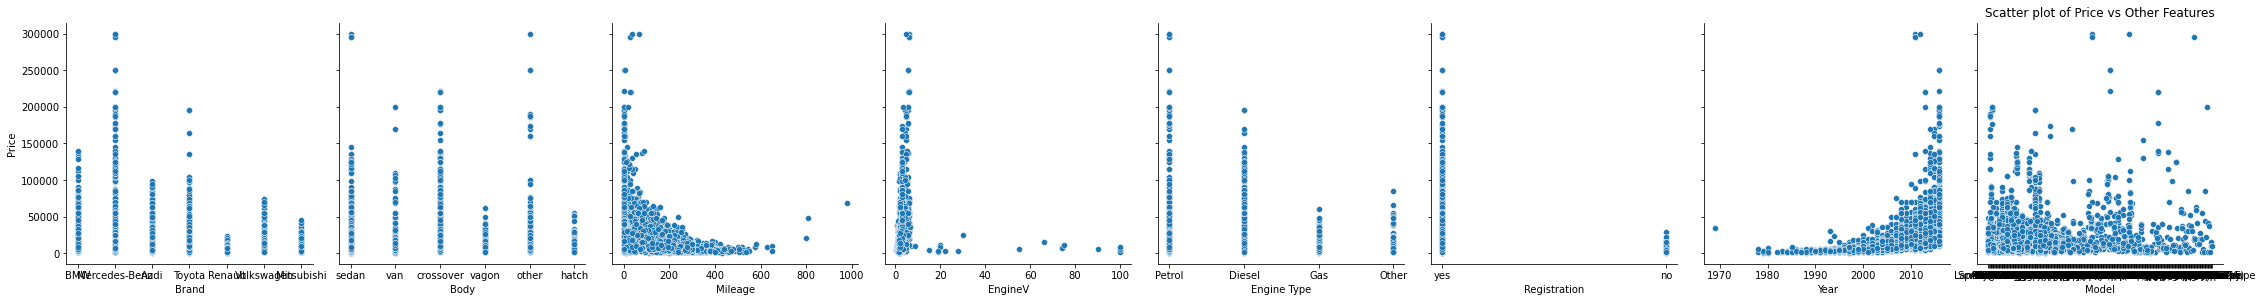

In [200]:
sns.pairplot(cars_data, x_vars=[ 'Brand','Body','Mileage','EngineV','Engine Type','Registration','Year','Model'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.title('Scatter plot of Price vs Other Features')
plt.show()

In [201]:
cars_data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [202]:
cars_data['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [203]:
cars_data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [204]:
cars_data['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [205]:
cars_data['Registration'].unique()

array(['yes', 'no'], dtype=object)

In [206]:
cars_data = cars_data.drop('Model', axis=1)

In [207]:
cars_data = cars_data.drop('Year', axis=1)

In [208]:
cars_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025
unique,7,NaN,6,NaN,NaN,4,2
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes
freq,880,NaN,1534,NaN,NaN,1861,3654
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN


In [209]:
#encoding all categorical values
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
 
X = onehotencoder.fit_transform(cars_data['Brand'].values.reshape(-1,1)).toarray()

In [210]:
dfOneHot = pd.DataFrame(X, columns = ["Brand_"+str(int(i)) for i in range(X.shape[1])]) 

In [211]:
cars_data = pd.concat([cars_data, dfOneHot], axis=1)
 
cars_data= cars_data.drop(['Brand'], axis=1) 


In [212]:
cars_data.describe(include="all")

,Price,Body,Mileage,EngineV,Engine Type,Registration,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6
count,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000
unique,NaN,6,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1534,NaN,NaN,1861,3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,19552.308065,NaN,163.572174,2.764586,NaN,NaN,0.104348,0.159006,0.204472,0.076273,0.110559,0.126708,0.218634
std,25815.734988,NaN,103.394703,4.935941,NaN,NaN,0.305749,0.365727,0.403365,0.265468,0.313624,0.332687,0.413371
min,600.000000,NaN,0.000000,0.600000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6999.000000,NaN,90.000000,1.800000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11500.000000,NaN,158.000000,2.200000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21900.000000,NaN,230.000000,3.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [213]:
X = onehotencoder.fit_transform(cars_data['Body'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Body_"+str(int(i)) for i in range(X.shape[1])]) 
cars_data = pd.concat([cars_data, dfOneHot], axis=1)
 
cars_data= cars_data.drop(['Body'], axis=1) 

In [214]:
X = onehotencoder.fit_transform(cars_data['Engine Type'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Engine_Type_"+str(int(i)) for i in range(X.shape[1])]) 
cars_data = pd.concat([cars_data, dfOneHot], axis=1)
 
cars_data= cars_data.drop(['Engine Type'], axis=1) 

In [215]:
#since it has just 2 categories we can use LabelEncoder instead of Onehotencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cars_data['Registration'] = le.fit_transform(cars_data['Registration'])

In [216]:
cars_data.head()

,Price,Mileage,EngineV,Registration,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,...,Body_2,Body_3,Body_4,Body_5,Body_6,Engine_Type_0,Engine_Type_1,Engine_Type_2,Engine_Type_3,Engine_Type_4
0,4200.0,277.0,2.0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7900.0,427.0,2.9,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,13300.0,358.0,5.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23000.0,240.0,4.2,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18300.0,120.0,2.0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [217]:
#scaling the numerical values
from sklearn.preprocessing import StandardScaler 
cols=['Price','Mileage','EngineV']
for i in cols:
    scale = StandardScaler().fit(cars_data[[i]])
    cars_data[[i]]=scale.transform(cars_data[[i]])

In [218]:
cars_data.head()

,Price,Mileage,EngineV,Registration,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,...,Body_2,Body_3,Body_4,Body_5,Body_6,Engine_Type_0,Engine_Type_1,Engine_Type_2,Engine_Type_3,Engine_Type_4
0,-0.594762,1.097173,-0.154921,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.451421,2.548105,0.027438,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.242220,1.880676,0.452941,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.133567,0.739277,0.290845,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.048516,-0.421468,-0.154921,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


3) Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

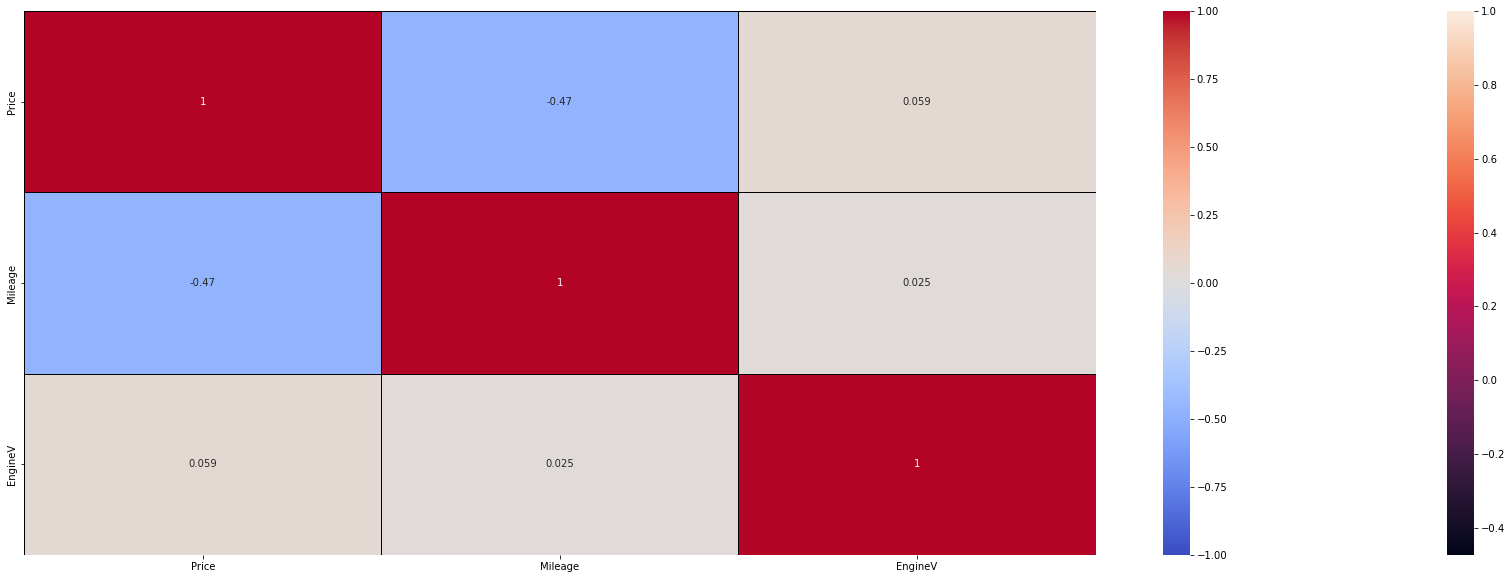

In [219]:
#Determining the coorelation between different attributes and analysing their features
plt.figure(figsize=(30, 10))               

sns.heatmap(cars_data[cols].corr())               
sns.heatmap(cars_data[cols].corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')  
plt.show()

In terms of numerical values, mileage seems to be the primary predictor for Price

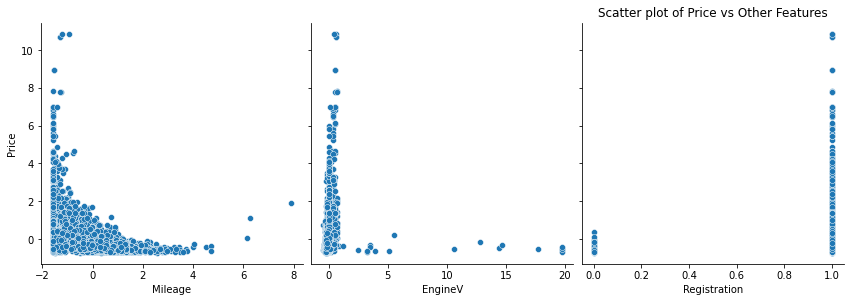

In [220]:
sns.pairplot(cars_data, x_vars=['Mileage','EngineV','Registration'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.title('Scatter plot of Price vs Other Features')
plt.show()

Price         AxesSubplot(0.125,0.71587;0.168478x0.16413)
Mileage    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
EngineV    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
dtype: object

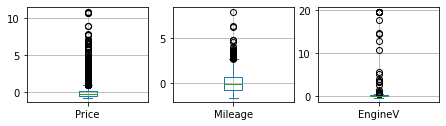

In [221]:
#checking for outliers
cars_data[[ 'Price','Mileage','EngineV']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

In [257]:
#filling na values
cars_data['Price'].fillna(cars_data['Price'].median(),inplace=True)

In [258]:
cars_data['Mileage'].fillna(cars_data['Mileage'].median(),inplace=True)

In [259]:
cars_data['EngineV'].fillna(cars_data['EngineV'].median(),inplace=True)

In [222]:
#for outliers, the ones that are in the upper bound are replaced by the upperbound
u=cars_data['Price'].quantile(0.99)
cars_data['Price'][cars_data['Price']>u]=u

/var/folders/t2/cjw60qy93xng7qgh7srlxpj00000gn/T/ipykernel_16537/1433545272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['Price'][cars_data['Price']>u]=u


In [223]:
ul=cars_data['Mileage'].quantile(0.99)
cars_data['Mileage'][cars_data['Mileage']>ul]=ul

/var/folders/t2/cjw60qy93xng7qgh7srlxpj00000gn/T/ipykernel_16537/4159040359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['Mileage'][cars_data['Mileage']>ul]=ul


In [224]:
ue=cars_data['EngineV'].quantile(0.99)
cars_data['EngineV'][cars_data['EngineV']>ue]=ue

/var/folders/t2/cjw60qy93xng7qgh7srlxpj00000gn/T/ipykernel_16537/1044007886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data['EngineV'][cars_data['EngineV']>ue]=ue


Price         AxesSubplot(0.125,0.71587;0.168478x0.16413)
Mileage    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
EngineV    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
dtype: object

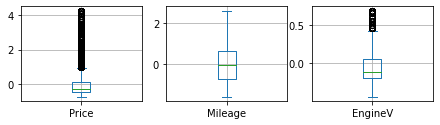

In [225]:
#outliers removed
cars_data[[ 'Price','Mileage','EngineV']].plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8), grid=True)

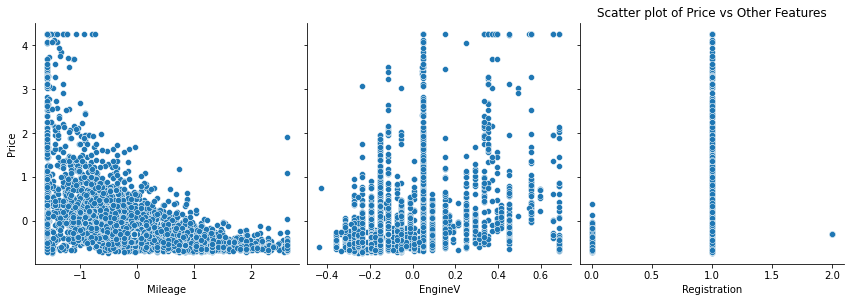

In [260]:
#checking scatterplot for relation
sns.pairplot(cars_data, x_vars=['Mileage','EngineV','Registration'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.title('Scatter plot of Price vs Other Features')
plt.show()

4) Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

In [261]:
from sklearn.model_selection import train_test_split

In [269]:
x = cars_data.drop('Price', axis=1) # predictors
y = cars_data['Price'] # target var
np.nan_to_num(x)
np.nan_to_num(y)
x = x.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y = y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# splitting data into training: 80% and testing: 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [270]:

cars_data.describe(include='all')

,Price,Mileage,EngineV,Registration,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,...,Body_2,Body_3,Body_4,Body_5,Body_6,Engine_Type_0,Engine_Type_1,Engine_Type_2,Engine_Type_3,Engine_Type_4
count,4345.000000,4345.000000,4345.000000,4345.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,...,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4344.000000,4344.000000,4344.000000,4344.000000,4344.000000
mean,-0.043595,-0.011874,-0.060491,0.988262,0.104348,0.159006,0.204472,0.076273,0.110559,0.126708,...,0.091204,0.355093,0.087731,0.144907,0.068287,0.428407,0.135820,0.024401,0.337937,0.073435
std,0.822845,0.931222,0.197083,0.398663,0.305749,0.365727,0.403365,0.265468,0.313624,0.332687,...,0.287932,0.478597,0.282937,0.352048,0.252267,0.494905,0.342636,0.154310,0.473062,0.260879
min,-0.734229,-1.582214,-0.438590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.474665,-0.643944,-0.175183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.311953,-0.053899,-0.114397,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.036714,0.545819,0.047700,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.271577,2.620845,0.686360,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [271]:
x_train.describe(include='all')

,Mileage,EngineV,Registration,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,...,Body_2,Body_3,Body_4,Body_5,Body_6,Engine_Type_0,Engine_Type_1,Engine_Type_2,Engine_Type_3,Engine_Type_4
count,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,...,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000,3476.000000
mean,-0.006410,-0.059451,0.985040,0.097814,0.144419,0.191312,0.069908,0.100690,0.116801,0.204545,...,0.089183,0.352129,0.088032,0.145282,0.068470,0.427215,0.133199,0.024453,0.340621,0.074511
std,0.939603,0.196194,0.396104,0.297105,0.351565,0.393391,0.255028,0.300962,0.321229,0.403427,...,0.285049,0.477703,0.283383,0.352436,0.252586,0.494745,0.339839,0.154474,0.473986,0.262638
min,-1.582214,-0.438590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.643944,-0.175183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.053899,-0.114397,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.574838,0.047700,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.620845,0.686360,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [272]:
x_test.describe(include='all')

,Mileage,EngineV,Registration,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Brand_6,...,Body_2,Body_3,Body_4,Body_5,Body_6,Engine_Type_0,Engine_Type_1,Engine_Type_2,Engine_Type_3,Engine_Type_4
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,...,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,-0.033729,-0.064649,1.001151,0.092060,0.158803,0.181818,0.073648,0.109321,0.119678,0.194476,...,0.096663,0.356732,0.084005,0.139241,0.065593,0.432681,0.146145,0.024166,0.326812,0.069045
std,0.897106,0.200660,0.408717,0.289277,0.365703,0.385917,0.261347,0.312221,0.324771,0.396025,...,0.295668,0.479311,0.277554,0.346397,0.247711,0.495733,0.353455,0.153652,0.469318,0.253676
min,-1.582214,-0.357542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.663290,-0.175183,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.053899,-0.114397,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.516801,0.043647,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.620845,0.686360,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


When we compare the statistical values of the features in the test data and the whole dataset, we can see that most of it are around the same range and hence it can be considered to be representative of the whole data set

5) Train a Linear Regression model using the training data with four-fold cross-validation using appropriate evaluation metric. Do this with closed form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. Display the training and validation loss as a function of training iterations.¶

In [273]:
from sklearn.model_selection import KFold
from sklearn.linear_model  import LinearRegression
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [274]:
def cross_validate_fn(model, X, y, n_splits=4):
    kf = KFold(n_splits=n_splits)
    scores = []
    for train_index, test_index in kf.split(X):
        #print(train_index,test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        scores.append(score)
    return np.array(scores)


In [275]:
#svd
lr = LinearRegression()
scores = cross_validate_fn(lr, x_train, y_train)
print("SVD Scores:", scores)
print("SVD Mean:", np.mean(scores))
print("SVD Std:", np.std(scores))

SVD Scores: [0.47823223 0.44711308 0.43052717 0.44345323]
SVD Mean: 0.4498314287368139
SVD Std: 0.017516641154046074


In [276]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
scores = cross_validate_fn(sgd, x_train, y_train)
print("SGD Scores:", scores)
print("SGD Mean:", np.mean(scores))
print("SGD Std:", np.std(scores))

SGD Scores: [0.46257297 0.44204989 0.42361398 0.44283164]
SGD Mean: 0.4427671177043977
SGD Std: 0.013780721726968821


In [277]:
def regularizationmodels(model, reg_tech, n_iter, lr):
    if (model == 'sgd'):
        #print("check")
        m=SGDRegressor(alpha=lr, penalty=reg_tech, max_iter=n_iter, tol=1e-3)
    if (model== 'svd' and reg_tech == 'l1'):
        print(lr)
        m=Lasso(alpha=lr)
        #print("check")
    if (model== 'svd' and reg_tech == 'l2'):
        m=Ridge(alpha=lr)
    if (model== 'svd' and reg_tech == 'elasticnet'):
        m=ElasticNet(alpha=lr)
    kf = KFold(n_splits=4)
    scores = []
    for train_index, test_index in kf.split(x_train):
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        train_loss_list=[]
        val_loss_list=[]
        for i in range(n_iter):
            #m.fit(X_train, Y_train)

            # Train the model and update the weights
            if (model== 'svd'):
                #print("check1")
                #since Lasso, Ridge and ElasticNet do not have partialfit
                m.fit(X_train, Y_train)
            elif(model =='sgd'):
                m.partial_fit(X_train, Y_train)

            # Calculate the training loss
            y_train_pred = m.predict(X_train)
            train_loss = mean_squared_error(Y_train, y_train_pred)
            train_loss_list.append(train_loss)

            # Calculate the validation loss
            y_val_pred = m.predict(X_test)
            val_loss = mean_squared_error(Y_test, y_val_pred)
            val_loss_list.append(val_loss)
        score = m.score(X_test, Y_test)
        scores.append(score)
    plt.plot(range(n_iter), train_loss_list, label='Training Loss')
    plt.plot(range(n_iter), val_loss_list, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
        
    print("Scores:", scores)
    print("Mean Score:", np.mean(scores))
    print("Score Std:", np.std(scores))
# Plot the training and validation loss
   

0.01


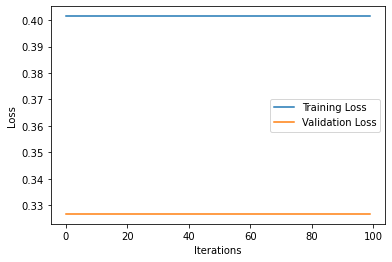

Scores: [0.47598932491043167, 0.44091601305696493, 0.42870859794661653, 0.4575032494601057]
Mean Score: 0.4507792963435297
Score Std: 0.017784523965912458


In [278]:
regularizationmodels('svd', 'l1',100, 0.01)

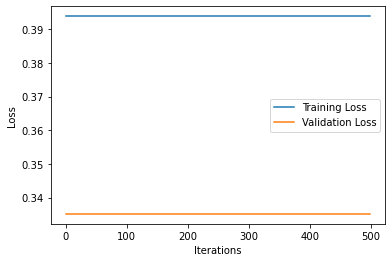

Scores: [0.4803754219233478, 0.4435996506662675, 0.4305458501764774, 0.44363035855410415]
Mean Score: 0.44953782033004924
Score Std: 0.018586369776877384


In [279]:
regularizationmodels('svd', 'l2',500, 0.1)

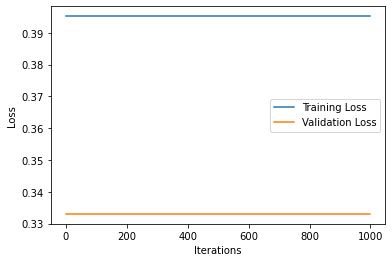

Scores: [0.47558289958285327, 0.4435738242869768, 0.4297936725968803, 0.44720861532214273]
Mean Score: 0.4490397529472133
Score Std: 0.016644666437730916


In [280]:
regularizationmodels('svd', 'l2',1000, 10)

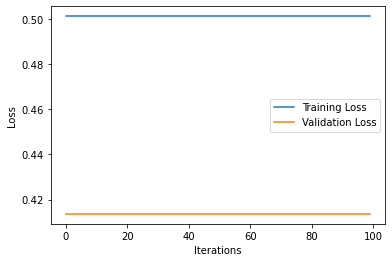

Scores: [0.30918809350832, 0.31184376313493256, 0.30621298186609214, 0.31340688134059125]
Mean Score: 0.31016292996248396
Score Std: 0.0027340819653808917


In [281]:
regularizationmodels('svd', 'elasticnet',100, 0.1)

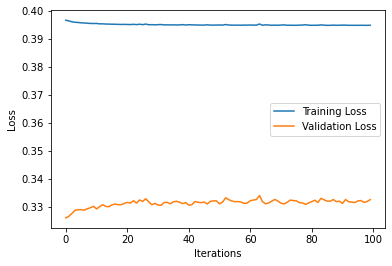

Scores: [0.4816755654975725, 0.44468662768202616, 0.43206968472771146, 0.4480837044990913]
Mean Score: 0.45162889560160036
Score Std: 0.018344812384344735


In [282]:
regularizationmodels('sgd', 'l1',100, 0.001)

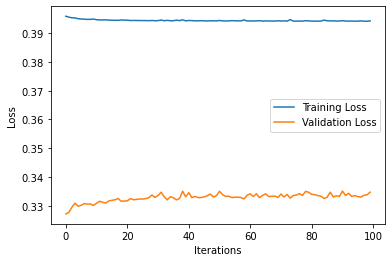

Scores: [0.48112719758570455, 0.4441340257635793, 0.43331157838876766, 0.44433569243433035]
Mean Score: 0.4507271235430955
Score Std: 0.018109286600849966


In [283]:
regularizationmodels('sgd', 'l1',100, 0.00001)

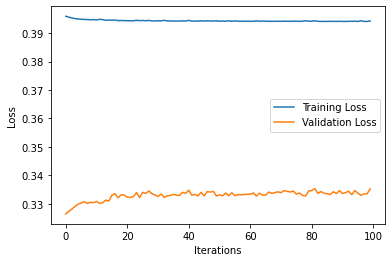

Scores: [0.4802347479977064, 0.4437422238339167, 0.4334555491517986, 0.44352937370141976]
Mean Score: 0.45024047367121034
Score Std: 0.017809100884434468


In [284]:
regularizationmodels('sgd', 'l2',100, 0.00001)

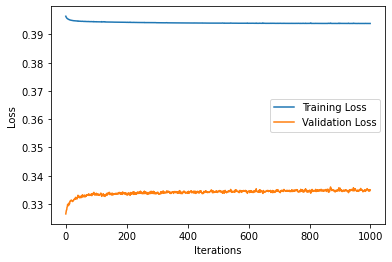

Scores: [0.4802672343178832, 0.4440073011323763, 0.431797429488313, 0.4438968791483523]
Mean Score: 0.44999221102173126
Score Std: 0.01817002564432484


In [285]:
regularizationmodels('sgd', 'elasticnet',1000, 0.000001)

Validation loss is lesser than training loss indicating overfitting

6) Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data.

In [286]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [287]:
def poly_fn(model,reg_tech, n_iter, lr,deg):
    if (model == 'sgd'):
        #print("check")
        m=SGDRegressor(alpha=lr, penalty=reg_tech, max_iter=n_iter, tol=1e-3)
    if (model== 'svd' and reg_tech == 'l1'):
        m=Lasso(alpha=lr)
        #print("check")
    if (model== 'svd' and reg_tech == 'l2'):
        m=Ridge(alpha=lr)
    if (model== 'svd' and reg_tech == 'elasticnet'):
        m=ElasticNet(alpha=lr)
    kf = KFold(n_splits=4)
    scores = []
    poly_features = PolynomialFeatures(degree=deg)
    for train_index, test_index in kf.split(x_train):
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        train_loss_list=[]
        val_loss_list=[]
        x_train_poly = poly_features.fit_transform(X_train)
        x_test_poly = poly_features.fit_transform(X_test)
        for i in range(n_iter):

            # Train the model and update the weights
            if (model== 'svd'):
                #print("check1")
                #since Lasso, Ridge and ElasticNet do not have partialfit
                m.fit(x_train_poly, Y_train)
            elif(model =='sgd'):
                m.partial_fit(x_train_poly, Y_train)

            # Calculate the training loss
            y_train_pred = m.predict(x_train_poly)
            train_loss = mean_squared_error(Y_train, y_train_pred)
            train_loss_list.append(train_loss)

            # Calculate the validation loss
            y_val_pred = m.predict(x_test_poly)
            val_loss = mean_squared_error(Y_test, y_val_pred)
            val_loss_list.append(val_loss)
        score = m.score(x_test_poly, Y_test)
        scores.append(score)
    plt.plot(range(n_iter), train_loss_list, label='Training Loss')
    plt.plot(range(n_iter), val_loss_list, label='Validation Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
        
        
    print("Scores:", scores)
    print("Mean Score:", np.mean(scores))
    print("Score Std:", np.std(scores))

   

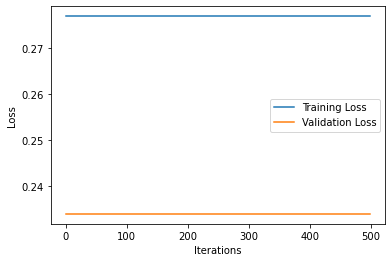

Scores: [0.6319175344751922, 0.6019421444505535, 0.6044924194707585, 0.6117960145673296]
Mean Score: 0.6125370282409585
Score Std: 0.01175925609846814


In [288]:
poly_fn('svd','l1',500,0.01,2)

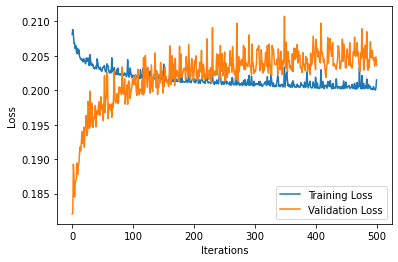

Scores: [0.6897331881952009, 0.6841272904097095, 0.6984794261021006, 0.6620260294889022]
Mean Score: 0.6835914835489783
Score Std: 0.013460379519498697


In [289]:
poly_fn('sgd','l1',500,0.001,3)

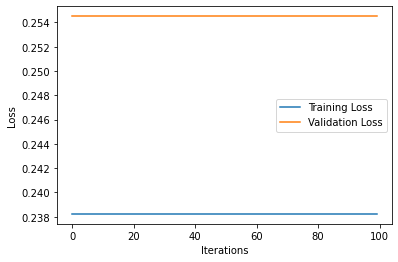

Scores: [0.6343922208745755, 0.628750159664802, 0.6138343542479905, 0.5775236784070668]
Mean Score: 0.6136251032986086
Score Std: 0.02215511886480195


In [290]:
poly_fn('svd','l2',100,0.01,2)

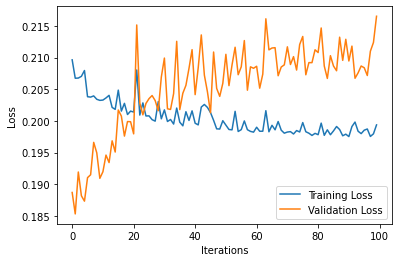

Scores: [0.6801427381190797, 0.6757965969848638, 0.6803923377233299, 0.6405551038820685]
Mean Score: 0.6692216941773355
Score Std: 0.016651240374926372


In [292]:
poly_fn('sgd','l2',100,0.01,3)

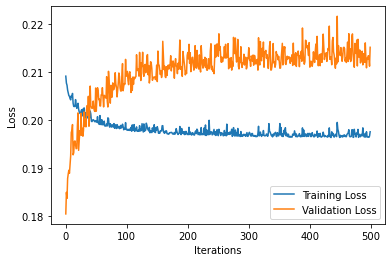

Scores: [0.6846402773340392, 0.6732235795049306, 0.6756799955896167, 0.6428089395900907]
Mean Score: 0.6690881980046692
Score Std: 0.01575610810004201


In [293]:
poly_fn('sgd','l2',500,0.01,3)

3-degree Polynomial Model with SGD Regression and Lasso regularization(iterations=500 and learning rate=0.001) has a score of 0.68 and the validation loss is close to training loss and doesn't sway away from training losses.

In [296]:
poly_features = PolynomialFeatures(degree=3)
scores=[]
kf = KFold(n_splits=4)
finalmodel=SGDRegressor(alpha=0.001, penalty='l1', max_iter=500, tol=1e-3)
for train_index, test_index in kf.split(x_train):
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    train_loss_list=[]
    val_loss_list=[]
    x_train_poly = poly_features.fit_transform(X_train)
    x_test_poly = poly_features.fit_transform(X_test)
    for i in range(500):
        finalmodel.partial_fit(x_train_poly, Y_train)

                # Calculate the training loss
        y_train_pred = finalmodel.predict(x_train_poly)
        train_loss = mean_squared_error(Y_train, y_train_pred)
        train_loss_list.append(train_loss)

        # Calculate the validation loss
        y_val_pred = finalmodel.predict(x_test_poly)
        val_loss = mean_squared_error(Y_test, y_val_pred)
        val_loss_list.append(val_loss)
    score = finalmodel.score(x_test_poly, Y_test)
    scores.append(score)

7) Make predictions of the labels on the test data, using the trained model with chosenhyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.

In [299]:
y_test_pred=finalmodel.predict(poly_features.fit_transform(x_test))

In [300]:
mean_squared_error(y_test, y_test_pred)

0.18515466625441857

In [306]:
y_test.describe()

count    869.000000
mean      -0.066982
std        0.764425
min       -0.718771
25%       -0.470791
50%       -0.311953
75%        0.013470
max        4.271577
Name: Price, dtype: float64

In [307]:
y_test_pred.max()

3.8003017358084596

In [308]:
y_test_pred.mean()

-0.029390350431055052

In [301]:
#trying out for Lasso model as well for comparison
final_model_l = Lasso(alpha=0.01, max_iter=100)
kf = KFold(n_splits=4)
scores = []
for train_index, test_index in kf.split(x_train):
    #print(train_index,test_index)
    X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
    Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
    final_model_l.fit(X_train, Y_train)

In [302]:
y_test_pred_l=final_model_l.predict(x_test)

In [303]:
mean_squared_error(y_test, y_test_pred_l)

0.3122913776724388

The polynomial model with degree 3 is able to predict the car prices with a loss of 0.18
We can improve this performance using the following steps:-
. Using a better alternative to replace outliers instead of the 0.99 quantile
. Refining the replacement for NA values
. Using the features Year and Model 
. trying different train-test split